In [1]:
from __future__ import division, print_function

# to suppress warnings of Seaborn's usage of Matplotlib
import warnings
warnings.filterwarnings("ignore")

<center>
<h1>The Python Data Sience Stack</h1>
<br>
<h3>Dr. Florian Wilhelm</h3>
<h4>Senior Professional: Data Scientist @ CSC</h4>
</center>

# What is Python?

* multi-purpose
* focused on readability and productivity
* easy to learn
* object oriented
* interpreted
* strongely and dynamically typed
* cross platform

# Features

* indentation is part of the syntax 
* high level data types (tuples, lists, dictionaries, sets)
* Python Standard Library (Batteries included)
  * string sevices, regular expressions
  * mathematical modules
  * IO, file formats and data persistence
  * OS, threading, multiprocessing
  * networking, email, html, webbrowser
  * ...
* easily extensible with C/C++ (glue language)
* tons of external libraries

# Why Python for Analytics?

Besides the features already mentioned, Python has:

* large communities for data science, analytics, visualisation etc.,
* many and well-established libraries,
* lots of examples and documentation,
* **huge** demand from the industry.

<img src="./pics/jobgraph.png">

<center>
<h1> Python 2 vs. 3</h1>
<img src="./pics/python-2-vs-3.jpg" width=80%><br style="clear:both"/>
Source: <a href=http://learntocodewith.me/programming/python/python-2-vs-python-3/>LearnToCodeWithMe</a>
</center>

<center>
<h1>Installation</h1>
</center>

### Linux & Mac 

<img src="./pics/linux.jpeg" align="left" width=13%><br style="clear:both"/>
*It is already installed!* Use [virtualenv](http://virtualenv.readthedocs.org/) and [pip](https://pip.pypa.io/) to setup isolated environments and install more packages. [Conda](http://conda.pydata.org/docs/) is an alternative.

### Windows 
<img src="./pics/anaconda.png" align="left" width=15%><br style="clear:both"/>

*A bit trickier!* Best use the [Anaconda distribution](https://www.continuum.io/downloads) from Continuum Analytics to install everything you need to get going.


# Primer on Python

Strong and dynamically typed

In [2]:
x = 23
3*x

69

In [3]:
x = "Hello "
y = "World!"
print(x + y)

Hello World!


In [4]:
print(x + 1)

TypeError: cannot concatenate 'str' and 'int' objects

## Indentation matters!

In [5]:
x = 3

if x > 0:
    if x % 2 == 0:
        print("Positive, even number!")
    else:
        print("Positive, odd number!")
else:
    print("Non-positive number!")

Positive, odd number!


In [6]:
def bmi(height, weight):
    return weight / height**2

print("The BMI is: {:.3}".format(bmi(1.85, 79)))

The BMI is: 23.1


## Tuples

In [7]:
x = (1, 3, 5)
print(x)

(1, 3, 5)


In [8]:
x[2]

5

In [9]:
a, b, c = x
print(a + b + c)

9


## Lists

In [10]:
x = [1, 3, 5]
print(x)

[1, 3, 5]


In [11]:
x.append(7)
print(x)

[1, 3, 5, 7]


In [12]:
del x[0]
print(x)

[3, 5, 7]


## Dictionaries

In [13]:
x = {'a': 1, 'b': 2, 'c': 3}

In [14]:
print(x['b'])

2


In [15]:
x['d'] = 4
print(x)

{'a': 1, 'c': 3, 'b': 2, 'd': 4}


## Loops and list comprehension

In [16]:
x = []
for i in range(5):
    x.append(i**2)
print(x)

[0, 1, 4, 9, 16]


In [17]:
x = [i**2 for i in range(5)]
print(x)

[0, 1, 4, 9, 16]


<center><h1>Python Data Science Stack</h1>
<br>
<img src="./pics/stack_empty.png" width=90%>
</center>

<center><h1>Python Data Science Stack</h1>
<br>
<img src="./pics/stack_full.png" width=90%><br style="clear:both"/>
</center>

# Python Data Science Stack

* **NumPy** to work efficiently with multi-dimensional arrays and matrices. Includes some high-level mathematical operations.
* **SciPy** extends NumPy with additional modules (optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers etc.).
* **Pandas** builds upon NumPy and provides high-performance, easy-to-use data structures and data analysis tools .
* **Scikit-Learn** provides simple and efficient machine learning tools for data mining and data analysis.
* **matplotlib** provides 2d plotting capabilities. Use additionally **Seaborn** for statistical plots.
* **IPython** is a powerful interactive shell and a kernel for *Jupyter*.
* **Jupyter** Notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. 

<center><h1>Jupyter/IPython Notebook</h1>
<img src="./pics/notebook.png" widht=60%><br style="clear:both"/>
</center>

<center><h1>Titanic: Analysis of a Disaster</h1>
<img src="./pics/titanic.jpg" widht=60%><br style="clear:both"/>
Painting from <a href=https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic>Willy Stöwer</a>, source & more information: <a href=https://www.kaggle.com/c/titanic>Kaggle</a>
</center>

## Setting things up and reading in the data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./input/train.csv')

In [19]:
df = df.drop('PassengerId', axis=1)
df = df.rename(columns={'Survived': 'Alive', 'Pclass': 'Class', 'Embarked': 'Port'})
df['Name'] = df['Name'].str[:10]

In [20]:
df.head()

,Alive,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Port
0,0,3,"Braund, Mr",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, M",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen,",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle,",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr.",male,35,0,0,373450,8.0500,NaN,S


## Preprocessing

In [21]:
# We drop some hard to use columns and define 'Embarked' and 'Sex' as categories
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df['Port'] = df['Port'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Class'] = df['Class'].astype('category')
df.head()

,Alive,Class,Sex,Age,SibSp,Parch,Fare,Port
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [22]:
df.shape

(891, 8)

## Data cleansing

In [23]:
df.describe()

,Alive,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df[['Sex', 'Port']].describe()

,Sex,Port
count,891,889
unique,2,3
top,male,S
freq,577,644


In [25]:
# Fill not available observations
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)
df['Port'] = df['Port'].fillna('S')

In [26]:
df[['Sex', 'Port']].describe()

,Sex,Port
count,891,891
unique,2,3
top,male,S
freq,577,646


## Some analysis plots

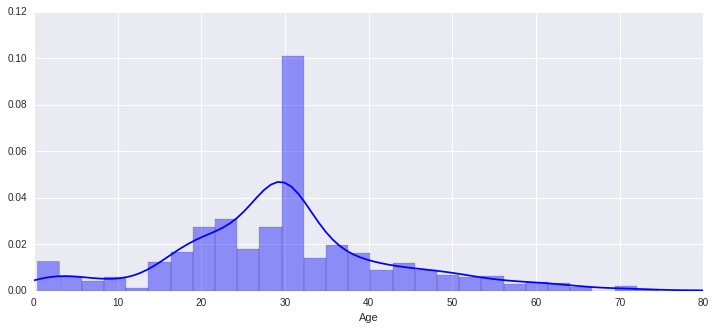

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.axes.set_xlim(0, 80)
g = sns.distplot(df['Age'], color="b", ax=ax)

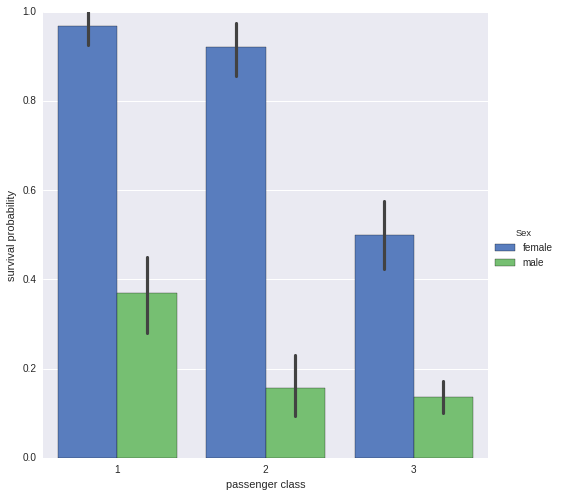

In [28]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="Class", y="Alive", hue="Sex", data=df, size=7, kind="bar", palette="muted")
g.set_ylabels("survival probability")
g.set_xlabels("passenger class")

## Fitting a simple predictive model

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

# Define features and target variables
X = df.drop('Alive', axis=1)
y = df['Alive']
# Convert categories to integer values
X['Sex'] = X['Sex'].cat.codes
X['Port'] = X['Port'].cat.codes
# Convert to NumPy arrays
X = X.values
y = y.values

In [30]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
# Create and train the model
model = RandomForestClassifier(n_estimators = 100, random_state=0)
model = model.fit(X_train, y_train)

In [32]:
preds = model.predict(X_test)
print("Accuracy: {:.1%}".format(np.mean(preds == y_test)))

Accuracy: 83.4%


<center><h1>Questions?</h1><br>
<img src=./pics/light-bulb.jpg align="center" width=40%/></center>

# Credits

<br>
This presentation was inspired by:

* [Savarin's PyCon UK Tutorial](http://nbviewer.jupyter.org/github/savarin/pyconuk-introtutorial/blob/master/notebooks/Section%201-1%20-%20Filling-in%20Missing%20Values.ipynb)
* [Thomas Wicki's Introduction to Data Analysis with Python](http://nbviewer.jupyter.org/github/twiecki/pydata_ninja/blob/master/PyData%20Ninja.ipynb)
* [Kaggle's Titantic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)